# ガラスの熱膨張に関するグラフ

In [1]:
import pandas as pd 

df = pd.read_csv("glass.csv").set_index('t', drop=False)
df

,t,X,A,dL,dL/L0,Valiation
t,,,,,,
20,20,3.00,0.00,0.000000,0.000000,0.000000
25,25,3.01,0.01,0.000005,0.000001,0.000000
30,30,3.07,0.07,0.000035,0.000007,0.000006
35,35,3.11,0.11,0.000055,0.000011,0.000004
40,40,3.11,0.11,0.000055,0.000011,0.000000
...,...,...,...,...,...,...
445,445,6.10,3.10,0.001550,0.000321,-0.000001
450,450,6.00,3.00,0.001500,0.000311,-0.000010
455,455,5.50,2.50,0.001250,0.000259,-0.000052


coefficient = [[1.1672e-06]] [[-4.73272727e-07]]
intercept = [-6.30638095e-05] [0.00052857]
score = 0.9983093499771882 0.9205268826071648
intersection = [360.65002908] [0.00035789]


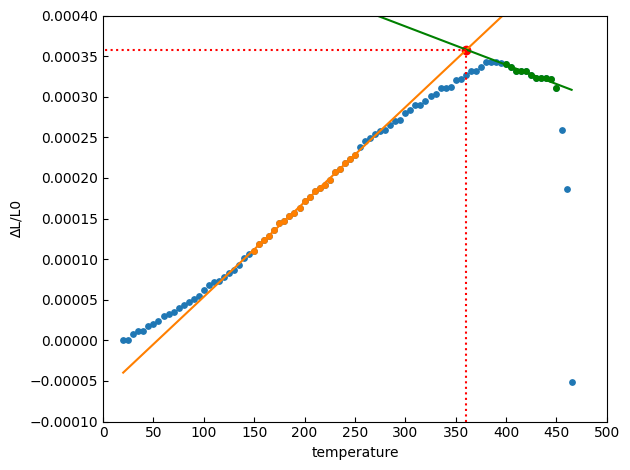

In [2]:
import numpy as np  
from numpy.linalg import solve
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn import linear_model

#pre Data
x = df.index.values
y = df['dL/L0'].values

X0 = df.loc['150':'250', 't'].values.reshape(-1,1)
Y0 = df.loc['150':'250', 'dL/L0'].values.reshape(-1,1)

X1 = df.loc['400':'450', 't'].values.reshape(-1,1)
Y1 = df.loc['400':'450', 'dL/L0'].values.reshape(-1,1)


#Regression
model0 = linear_model.LinearRegression()
model0.fit(X0,Y0)
pred_Y0 = model0.predict(x.reshape(-1,1))

model1 = linear_model.LinearRegression()
model1.fit(X1,Y1)
pred_Y1 = model1.predict(x.reshape(-1,1))


#info of regression
print("coefficient =", model0.coef_, model1.coef_)
print("intercept =", model0.intercept_, model1.intercept_)
print("score =", model0.score(X0, Y0), model1.score(X1,Y1))


#compute the intersection 
left = np.array([model0.coef_, [[-1]], model1.coef_, [[-1]]]).reshape(2,2)
right = np.array([-model0.intercept_, -model1.intercept_])

intersection_x, intersection_y = solve(left, right)
print("intersection =",intersection_x,intersection_y)


#visualization
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim(0,500)
ax.set_xticks(np.arange(0,550,50))
ax.set_xlabel("temperature")
ax.set_ylim(-1e-4,4e-4)
ax.set_yticks(np.arange(-1e-4,4.5e-4,5e-5))
ax.set_ylabel("∆L/L0")
ax.tick_params(direction='in')

ax.scatter(x,y,s=15)
ax.scatter(X0,Y0,s=15,color='#ff7f00')
ax.scatter(X1,Y1,s=15,color='green')
ax.plot(x,pred_Y0,color='#ff7f00')
ax.plot(x,pred_Y1,color='green')
ax.scatter(intersection_x, intersection_y, color='red') #scatter intercection
ax.plot(np.repeat(intersection_x,2), np.append(-1e-4,intersection_y), color='red', linestyle='dotted')
ax.plot(np.append(intersection_x,0), np.repeat(intersection_y,2), color='red', linestyle='dotted')
# plt.tight_layout()
# plt.savefig("glass.pdf", format="pdf", dpi=300)
plt.show()

# 原料からの熱膨張係数の計算

In [27]:
import numpy as np 

material_mass = np.array([6.20, 7.80, 1.37])

material_mass[1] = (material_mass[0] / 201.37 * 2 * 69.62) + (material_mass[1] / 61.83 * 0.5 * 69.62)
material_mass[0] = material_mass[0] / 201.37 * 61.98

comp_frac = material_mass / np.sum(material_mass) * 100
alpha = np.array([0.333e-8, 33.3e-8, 10.0e-8])

np.sum(comp_frac * alpha)

2.5368728372141333e-05